In [1]:
import numpy as np
from celmech.hamiltonian import Hamiltonian,PhaseSpaceState
from sympy import symbols,cos,sqrt

In [2]:
p,theta,m,g,l=symbols("p,theta,m,g,l")
H = p*p/2/(m*l*l) + (m*g*l) * (1 - cos(theta))
H

                        2  
                       p   
g⋅l⋅m⋅(1 - cos(θ)) + ──────
                        2  
                     2⋅l ⋅m

In [3]:
theta0,p0=np.pi/2,0
state = PhaseSpaceState([theta,p],[theta0,p0])
pars=dict()
pars[g]=9.8
pars[l] = 1
pars[m] = 0.15
ham = Hamiltonian(H,pars,state)

In [4]:
# symbolic hamiltonian
ham.H

                        2  
                       p   
g⋅l⋅m⋅(1 - cos(θ)) + ──────
                        2  
                     2⋅l ⋅m

In [5]:
# numeric hamiltonian
ham.N_H

                  2                     
3.33333333333333⋅p  - 1.47⋅cos(θ) + 1.47

In [6]:
# canonical variables and their time derivatives
display([(var,ham.N_Lie_deriv(var)) for var in ham.qp_vars])

[(θ, 6.66666666666667⋅p), (p, -1.47⋅sin(θ))]

In [7]:
ham.integrator.set_integrator('vode',method='adams')

omega0 = float(sqrt(g/l).subs(ham.H_params))
T0 = 2 * np.pi / omega0
times  = np.linspace(0,4*T0,100)
soln = np.zeros((len(times),len(state.values)))

for i,t in enumerate(times):
    # Double the length of of the pendulum at the  50th step
    if i==50:
        ham.H_params[l] *= 2
    ham.integrate(t)
    soln[i]=ham.state.values

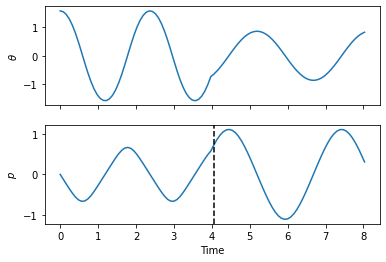

In [8]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(times,soln[:,0])
ax[0].set_ylabel(r"$\theta$")
ax[1].plot(times,soln[:,1],label="$p$")
ax[1].set_ylabel(r"$p$")
ax[1].set_xlabel("Time")
plt.axvline(times[50],ls='--',color='k')